In [113]:
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/rainfall_train.csv")
data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


# Preprocessing Data

- missing value

In [114]:
data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

there's no missing value in dataset

- Dimension of the data

In [115]:
print(f"Len of the rainfall dataset is {len(data)}")
print('------------------------')
print(f"variabel of  dataset are {data.columns.tolist()}")


Len of the rainfall dataset is 2190
------------------------
variabel of  dataset are ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']


- type of data

In [116]:
data.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

all the variabel is numerical and variabel y has transformed to numerical class

# EXPLANATORY DATA ANALYSIS

**level of measurement**: Since we cant use all 365 data to visualize, we want to convert data quarterly first and visualize based on that

for example

In [117]:
days=data['day']
#get date 2024 and matching with day
date_per=pd.to_datetime("2024-01-01") + pd.to_timedelta(days,unit='D')
matching_data=pd.DataFrame({
    'day':days,
    'date':date_per
})
#convert to period Q and acces string using. str and show only last two words
matching_data['quarter']=date_per.dt.to_period('Q').astype(str).str[-2:]
matching_data.head()


,day,date,quarter
0,1,2024-01-02,Q1
1,2,2024-01-03,Q1
2,3,2024-01-04,Q1
3,4,2024-01-05,Q1
4,5,2024-01-06,Q1


now we implement it to dataset

In [118]:
data['date']=pd.to_datetime("2024-01-01") + pd.to_timedelta(days,unit='D')
data['quarter']=data['date'].dt.to_period('Q').astype(str).str[-2:]
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,date,quarter
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,2024-01-02,Q1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2024-01-03,Q1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,2024-01-04,Q1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,2024-01-05,Q1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,2024-01-06,Q1


In [119]:
group_pressure=data.groupby('quarter')['pressure'].mean()
group_pressure.values

array([1017.7046595 , 1009.29333333, 1009.52581818, 1018.05028463])

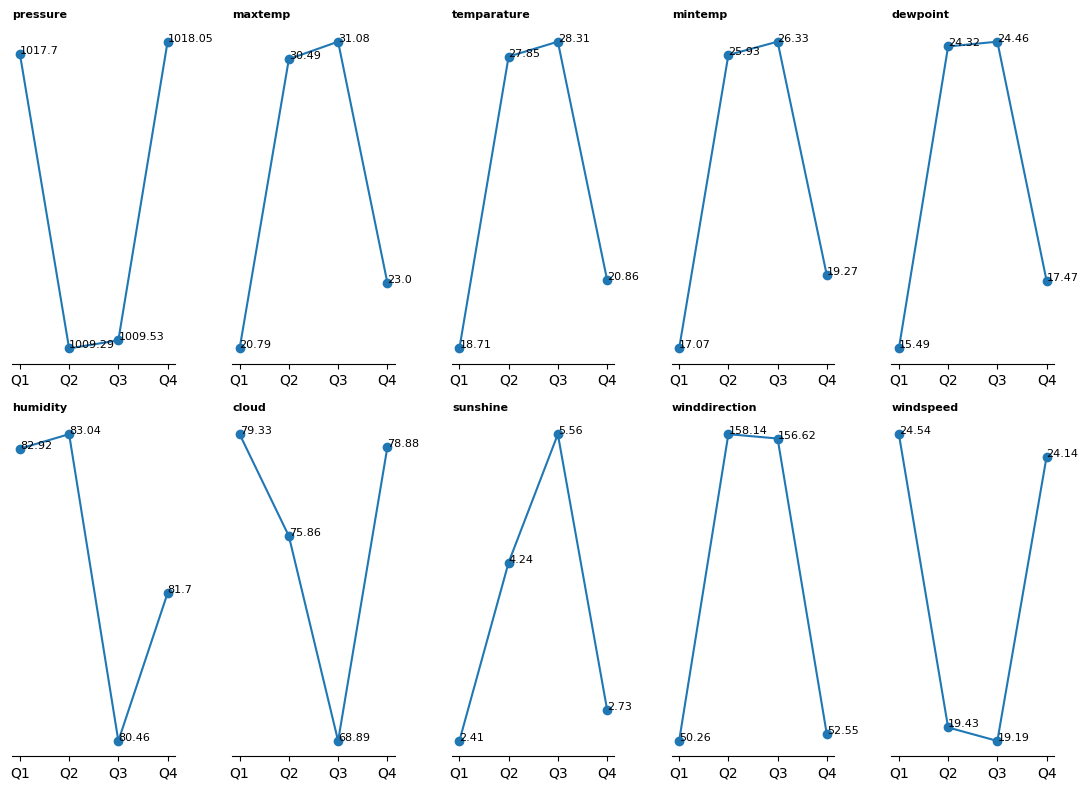

In [120]:
#defining column x variable
kol_x=[i for i in data.columns.tolist() if i!='id' and i!='day' and i!='date' and i!='rainfall' and i!='quarter']
#make line plot for all x variable
from matplotlib import pyplot as plt
nrow=2
ncol=5
fig,ax=plt.subplots(nrow,ncol,figsize=(11,8))
for (i,j),k in zip([(i,j) for i in range(nrow) for j in range(ncol)], kol_x):
    group_data=data.groupby('quarter')[k].mean()
    xtic=[i for i in range(4)]
    plotting=ax[i][j].plot(group_data.index,group_data.values,marker='o')
    ax[i][j].set_xticks(xtic)
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].set_yticks([])
    xval=plotting[0].get_xdata()
    yval=plotting[0].get_ydata()
    for l,m in zip(xval,yval):
        ytex=round(m,2)
        ax[i][j].text(l,m,f"{ytex}",fontsize=8)
    ax[i][j].set_title(f"{k}",loc='left',fontweight='bold',fontsize=8)
    
plt.tight_layout()



- based on quareter, variabel mintemp, temperature maxtemp, wind direction have same pattern,
-  presure, humadity, cloud, and windspeed are increased when we enter Q4

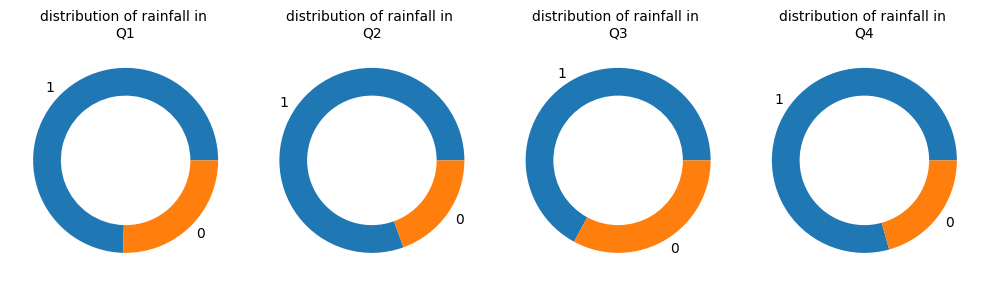

In [121]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
qua=data['quarter'].unique().tolist()
for i,j in zip(ax,qua):
    tabel_freq=data[data['quarter']==j]['rainfall'].value_counts()
    i.pie(tabel_freq.values,labels=tabel_freq.index,wedgeprops=dict(width=0.3))
    i.set_title(f"distribution of rainfall in \n{j}", fontsize=10)
plt.tight_layout()

- the rainfall 'yess' is dominating in every quarter in a year

**Check correlatio in every variable x**

In [122]:
#check corelation
corr=data[kol_x].corr()
corr

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
pressure,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012
maxtemp,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168
temparature,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262
mintemp,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871
dewpoint,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179
humidity,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285
cloud,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698
sunshine,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752
winddirection,-0.643293,0.662235,0.668963,0.663828,0.643073,-0.012430,-0.127087,0.272235,1.000000,-0.192417
windspeed,0.266012,-0.354168,-0.342262,-0.328871,-0.312179,0.062285,0.184698,-0.241752,-0.192417,1.000000


- Based on table correlation, there's strong positive correlation between temperature (mintemp and maxtemp too) and dew point, pressure and dewpoint, temperature have strong positive correlation
- there's negative strong corelation between cloud and sunshine

plot just strong corellation (positive and negative)

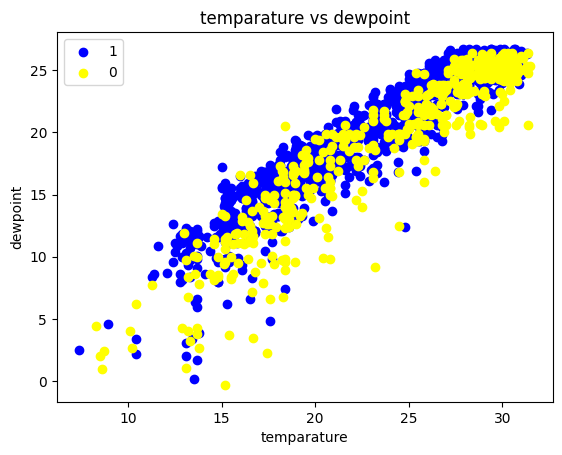

In [123]:
#temperature vs dew point
rainfall_type=data['rainfall'].unique().tolist()
for i,j in zip(rainfall_type,['blue','yellow']):
    ambil=data[data['rainfall']==i]
    plt.scatter(ambil['temparature'],ambil['dewpoint'],color=j,label=i)
    plt.xlabel('temparature')
    plt.ylabel('dewpoint')
    plt.title('temparature vs dewpoint')
    plt.legend()

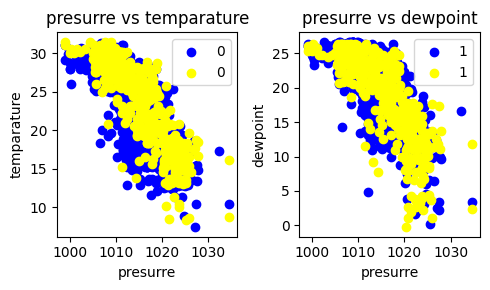

In [124]:
#presuere vs dew point
fig,ax=plt.subplots(1,2,figsize=(5,3))
for i,j in zip(range(2),['temparature','dewpoint']):
    rainfall_type=data['rainfall'].unique().tolist()
    for k,l in zip(rainfall_type,['blue','yellow']):
        ambil=data[data['rainfall']==k]
        ax[i].scatter(ambil['pressure'],ambil[j],color=l,label=i)
        ax[i].set_xlabel('presurre')
        ax[i].set_ylabel(j)
        ax[i].set_title(f'presurre vs {j}')
        ax[i].legend()
plt.tight_layout()


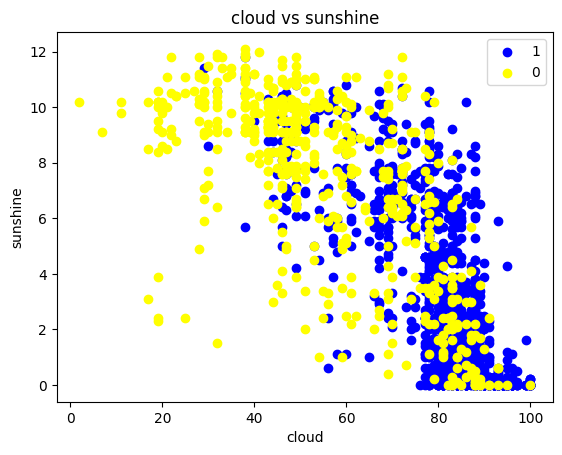

In [125]:
#cloud and shunshine
rainfall_type=data['rainfall'].unique().tolist()
for i,j in zip(rainfall_type,['blue','yellow']):
    ambil=data[data['rainfall']==i]
    plt.scatter(ambil['cloud'],ambil['sunshine'],color=j,label=i)
    plt.xlabel('cloud')
    plt.ylabel('sunshine')
    plt.title('cloud vs sunshine')
    plt.legend()

In [126]:
data['rainfall'].unique().tolist()

[1, 0]

**correlation every variable x vs y**

C:\Users\User\AppData\Local\Temp\ipykernel_8436\1658684302.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i][j].boxplot(kum,labels=data['rainfall'].unique().tolist())
C:\Users\User\AppData\Local\Temp\ipykernel_8436\1658684302.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i][j].boxplot(kum,labels=data['rainfall'].unique().tolist())
C:\Users\User\AppData\Local\Temp\ipykernel_8436\1658684302.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i][j].boxplot(kum,labels=data['rainfall'].unique().tolist())
C:\Users\User\AppData\Local\Temp\ipykernel_8436\1658684302.py:8: MatplotlibDeprecationWarning: The '

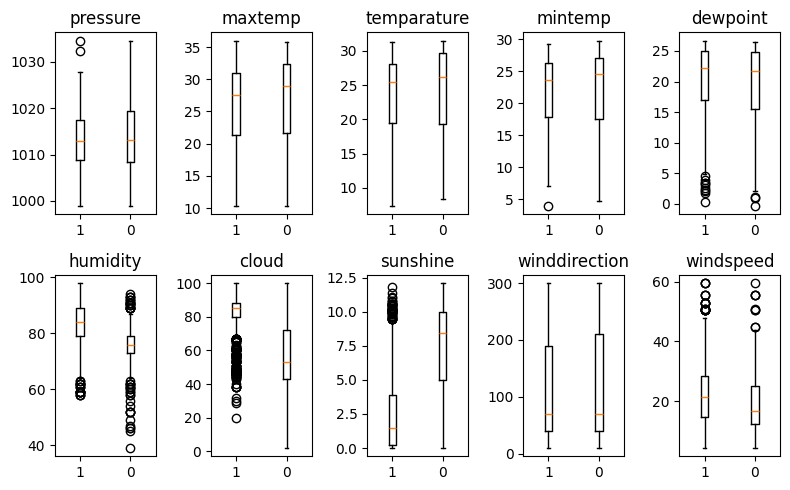

In [127]:
fig,ax=plt.subplots(2,5,figsize=(8,5))
for (i,j),k in zip([(i,j) for i in range (2) for j in range (5)],kol_x):
    kum=[]
    for l in data['rainfall'].unique().tolist():
        ambil=data[data['rainfall']==l]
        get_data=ambil[k]
        kum.append(get_data)
    ax[i][j].boxplot(kum,labels=data['rainfall'].unique().tolist())
    ax[i][j].set_title(k)
plt.tight_layout()

- cloud, sunshine, humidity, and windspeed distinguish between classm so there're relationship with y
- other than cloud, sunshine, humidity, and windspeed  are not separable, so there're no relationship y

# CLASSIFICATION

In [128]:
print(f"class label in this dataset is {data['rainfall'].unique().tolist()}")
print('---------------------')
data['rainfall'].value_counts()

class label in this dataset is [1, 0]
---------------------


rainfall
1    1650
0     540
Name: count, dtype: int64

- between class 1 and 0 has not equal or the dataset is imbalance.
- because there're some variable that has relationship with y we want to make two model:
    - logistic regression for cloud, sunshine, humidity, and windspeed
    - XGBOOST for all variable

**remove variabel that not important** : remove days and id

In [129]:
data_new=data.drop(['id','day'],axis=1)

**logistic regression**

In [130]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
data_cl=data_new.copy()
kol_log=['cloud','sunshine','windspeed','humidity']
X=data_cl[kol_log]
y=data_cl['rainfall']
#split teh dara into validation set, stratify keep distribution of class is same
xtrain,xval,ytrain,yval=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
xtrain.head()

,cloud,sunshine,windspeed,humidity
919,79.0,0.3,24.4,82.0
118,64.0,6.3,29.6,73.0
784,79.0,0.2,23.3,79.0
719,81.0,0.6,38.3,83.0
327,60.0,6.8,35.3,65.0


using : KFOLD : evaluate model performance divide subset data into K fold. K-1 fold for training and remaining fold for validation data and repeated for K times. Using stratifiedkfold when class label is imbalanced

In [131]:
#make kf
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
#since imbalance class we use roc_auc score
roc_train=[]
roc_val=[]
for tr_index,val_index in kf.split(xtrain,ytrain):
    xtrain_fold,xval_fold=xtrain.iloc[tr_index],xtrain.iloc[val_index]
    ytrain_fold,yval_fold=ytrain.iloc[tr_index],ytrain.iloc[val_index]
     #scaler
    scaler=StandardScaler()
    tr_clean=scaler.fit_transform(xtrain_fold)
    val_clean=scaler.transform(xval_fold)
    #make model
    model_log=LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)
    model_log.fit(tr_clean,ytrain_fold)
    #extract only columns 1 column 1 is positive class
    tr_pred=model_log.predict_proba(tr_clean)[:,1]
    val_pred=model_log.predict_proba(val_clean)[:,1]
    #score
    score_tr=roc_auc_score(ytrain_fold,tr_pred)
    score_val=roc_auc_score(yval_fold,val_pred)
    roc_train.append(score_tr)
    roc_val.append(score_val)
print('roc auc score training :')
print('-----------------------------------------')
print(roc_train)
print('-----------------------------------------')
print('roc auc score validation :')
print('-----------------------------------------')
print(roc_val)

roc auc score training :
-----------------------------------------
[np.float64(0.8910902503293807), np.float64(0.8854111769872639), np.float64(0.8888596952180765), np.float64(0.8953516377649325), np.float64(0.881505627080049)]
-----------------------------------------
roc auc score validation :
-----------------------------------------
[np.float64(0.8763932427725531), np.float64(0.8982061999303378), np.float64(0.8841613812544045), np.float64(0.8601127554615927), np.float64(0.913715644820296)]


- for imbalance data, using class_weight ='balanced' to predict minority class is suits and liblinear solver is works well for binary classification
- ROC-AUC score : good for imbalanced data, its good for model know to separate between class
- based on training and validation roc-auc the model is not overfitting and works well because there' tiny gap between them. overfitting happen when training set is larger than validation set

In [132]:
#perform logistic regression in validation
standar=StandardScaler()
val_new=standar.fit_transform(xval)
pred=model_log.predict_proba(val_new)[:,1]
rocscore=roc_auc_score(yval,pred)
rocscore

np.float64(0.8781144781144782)

- thee roc auc score above is considered godd

**Perform logistic regression in test set**

In [133]:
import pandas as pd
data_test=pd.read_csv("C:/Users/User/Documents/rainfall_test.csv")
data_test.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5
729,2919,365,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6


In [134]:
X_test=data_test[kol_log]
xtest_str=standar.transform(X_test)
predict_test=model_log.predict_proba(xtest_str)[:,1]
#threshold 0.5 if more than 0,5 we conver to 1
threshold=0.5
def binary_class(x):
    if x>=0.5:
        return 1
    else:
        return 0
binary=list(map(binary_class,predict_test))
datakum=pd.DataFrame({
    'id':data_test['id'],
    'class':binary
})
datakum

,id,class
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [186]:
datakum['class'].value_counts()

class
1    662
0     68
Name: count, dtype: int64

**using xgboost in all x variable** : using tree rather than probability, learn from mistake and improve based on them (like add more weighting for rare class)

In [151]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost
from sklearn.metrics import roc_auc_score
data_xg=data_new.copy()
X=data_xg[kol_x]
y=data_xg['rainfall']
#split teh dara into validation set, stratify keep distribution of class is same
xtrain,xval,ytrain,yval=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
ytrain.shape

(1752,)

In [182]:
#make kf
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
tab_count=y.value_counts()
scale=tab_count.loc[1]/tab_count.loc[0]
#since imbalance class we use roc_auc score
roc_train=[]
roc_val=[]
for tr_index,val_index in kf.split(xtrain,ytrain):
    xtrain_fold,xval_fold=xtrain.iloc[tr_index],xtrain.iloc[val_index]
    ytrain_fold,yval_fold=ytrain.iloc[tr_index],ytrain.iloc[val_index]
    #make model
    model_xg=xgboost.XGBClassifier(scale_pos_weight=scale,
                                    eval_metric='auc',
                                    max_depth=2,
                                    reg_alpha=0.6,
                                    reg_lambda=9,
                                    n_estimators=200,
                                   gamma=5)
    model_xg.fit(xtrain_fold,ytrain_fold)
    #extract only columns 1 column 1 is positive class
    tr_pred=model_xg.predict_proba(xtrain_fold)[:,1]
    val_pred=model_xg.predict_proba(xval_fold)[:,1]
    #score
    score_tr=roc_auc_score(ytrain_fold,tr_pred)
    score_val=roc_auc_score(yval_fold,val_pred)
    roc_train.append(score_tr)
    roc_val.append(score_val)
print('roc auc score training :')
print('-----------------------------------------')
print(roc_train)
print('-----------------------------------------')
print('roc auc score validation :')
print('-----------------------------------------')
print(roc_val)

roc auc score training :
-----------------------------------------
[np.float64(0.9155097167325427), np.float64(0.9055198726394378), np.float64(0.9141842923454194), np.float64(0.9202999102294622), np.float64(0.9091839639166229)]
-----------------------------------------
roc auc score validation :
-----------------------------------------
[np.float64(0.8738244514106583), np.float64(0.9029954719609892), np.float64(0.893256694855532), np.float64(0.8677325581395351), np.float64(0.9094212473572939)]


 model_log=xgboost.XGBClassifier(scale_pos_weight=scale,
                                    eval_metric='auc',
                                    max_depth=2,
                                    reg_alpha=0.6,
                                    reg_lambda=9,
                                    n_estimators=200,
                                   gamma=5)

- scale_pos_weigt : for imbalanced data, the scale is class 1/class 0
- using auc-roc for evaluate model
- max deep, how deep tree, lower value - more generalize higher value tree more memorize data training, so model can overfitting
- reg-alpha = regularization L1 higher value model more generalize (its like keep important feature)
- reg lambda =regularization L2, same as reg-alpha (adjust tree grow, higher value more controllable, reduce overfitting)
- n_estimator=number of tree
- gamma = its like decision of split or not, higher value, tree will careful to split data, and low model tree easily split, so the model will complex

In [183]:
#perform logistic regression in validation
pred=model_xg.predict_proba(xval)[:,1]
rocscore=roc_auc_score(yval,pred)
rocscore

np.float64(0.887317620650954)

- the result xgboost is higher than using logistic regression

**XGBoost on test set**

In [184]:
import pandas as pd
data_test=pd.read_csv("C:/Users/User/Documents/rainfall_test.csv")
data_test.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5
729,2919,365,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6


In [192]:
X_test=data_test[kol_x]
predict_test=model_xg.predict_proba(X_test)[:,1]
#threshold 0.5 if more than 0,5 we conver to 1
threshold=0.5
def binary_class(x):
    if x>=0.5:
        return 1
    else:
        return 0
binary=list(map(binary_class,predict_test))
datakum=pd.DataFrame({
    'id':data_test['id'],
    'class':binary
})
datakum

,id,class
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [191]:
datakum['class'].value_counts()

class
1    662
0     68
Name: count, dtype: int64